# DESAFIO 2 - MACHINE LEARNING - DATA SCIENCE - DESAFIO LATAM

In [264]:
# Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import davies_bouldin_score, silhouette_score
import warnings
warnings.filterwarnings("ignore")

1. Leer el archivo Retail_Invoices.xlsx y realizar un análisis de calidad de datos, para
definir la calidad de la data entregada considerando valores anómalos, valores
faltantes, etc. Limpia lo que sea necesario y realiza un análisis exploratorio de los
datos considerando gráficos de distribuciones y correlaciones entre estos.

In [265]:
# Define la ruta del archivo
ruta_archivo = "data/Retail_Invoices.xlsx"

# Cargar el archivo en un DataFrame
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [266]:
# Información básica del DataFrame
print("Información básica del DataFrame:")
df.info()

Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [267]:
# Descripción de los datos.
df.describe()

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,2011-06-29 05:59:15.223073536,15238.498738,221.130599,374.045327,18.333889
min,2010-12-01 00:00:00,12346.000000,-80995.000000,-168469.600000,1.000000
25%,2011-03-29 00:00:00,13755.000000,30.000000,87.962500,3.000000
50%,2011-07-08 00:00:00,15136.000000,120.000000,241.505000,12.000000
75%,2011-10-10 00:00:00,16746.000000,254.000000,418.022500,24.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1733.149624,1170.215301,2018.482869,23.892111


In [268]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
df.isnull().sum()


Valores faltantes por columna:


InvoiceNo      0
InvoiceDate    0
CustomerID     0
Quantity       0
price_total    0
StockCode      0
dtype: int64

In [269]:
# Detectar valores duplicados
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


### Resumen:

- No se observan datos nulo, ni faltantes.
- No se observan filas duplicadas.
- Se pueden identificar datos negativos, optaremos por borrarlos ya que al ser ventas, no pueden tener valores negativos.
- Tenemos datos entre diciembre 2010 hasta diciembre 2011, sin embargo el ultimo mes aparentemente no esta completo, ya que la fecha superior es 2011-12-09.

In [270]:
# Eliminamos datos menores que 0
mascara = (df['Quantity'] > 0) & (df['price_total'] > 0)
df = df.loc[mascara]
print(df.shape)

(18532, 6)


In [271]:
# Volvemos a analizar los datos
df.describe()

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,18532,18532.000000,18532.000000,18532.000000,18532.000000
mean,2011-07-01 03:39:44.718324736,15266.378211,278.899363,480.865956,21.471886
min,2010-12-01 00:00:00,12346.000000,1.000000,0.380000,1.000000
25%,2011-03-30 00:00:00,13776.250000,74.000000,158.037500,6.000000
50%,2011-07-12 00:00:00,15178.500000,155.000000,303.040000,15.000000
75%,2011-10-12 00:00:00,16779.000000,291.000000,471.840000,28.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1734.116296,972.734580,1678.195579,24.920241


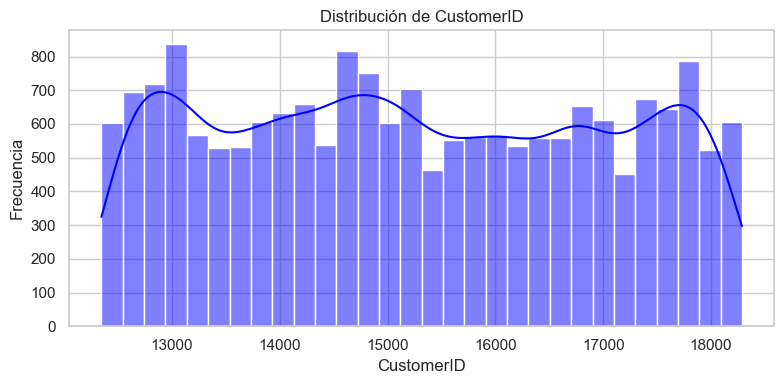

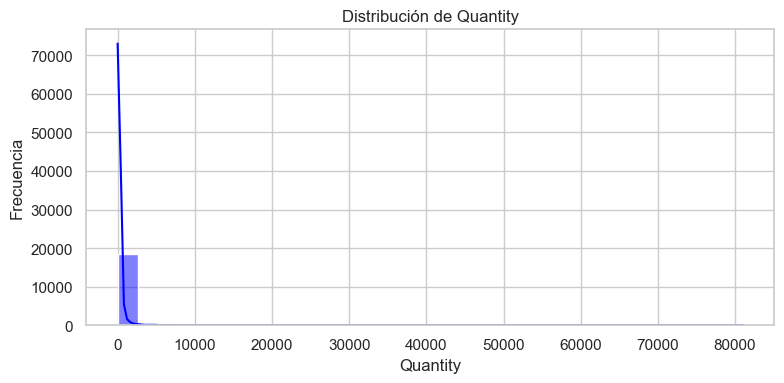

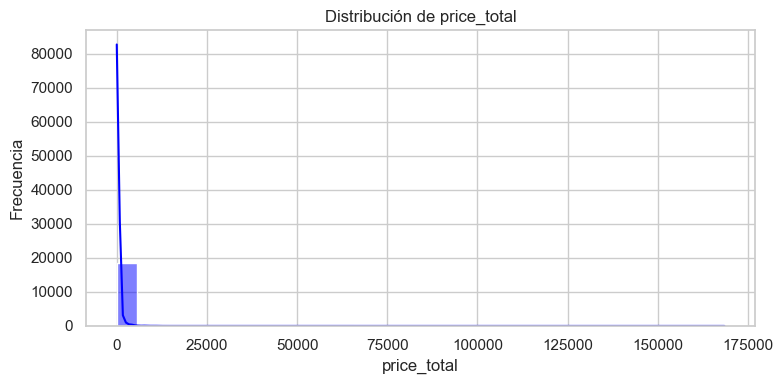

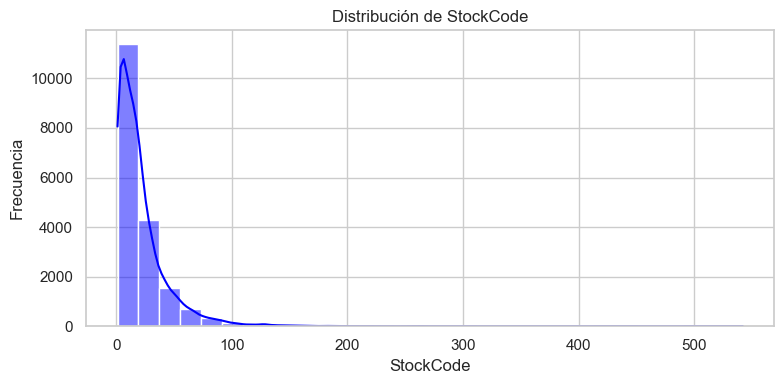

In [272]:
# Graficos de Distribucion
# Configuración general de estilo
sns.set(style="whitegrid")

# Columnas a analizar
cols_to_plot = ['CustomerID','Quantity', 'price_total', 'StockCode']

# Gráfico de distribución para cada columna
for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    
    if df[col].dtype in ['float64', 'int64']:  # Variables numéricas
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
    
    elif df[col].dtype == 'object':  # Variables categóricas
        top_categories = df[col].value_counts().head(10)  # Las 10 categorías más comunes
        sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
        plt.title(f"Frecuencia de las 10 principales categorías en {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


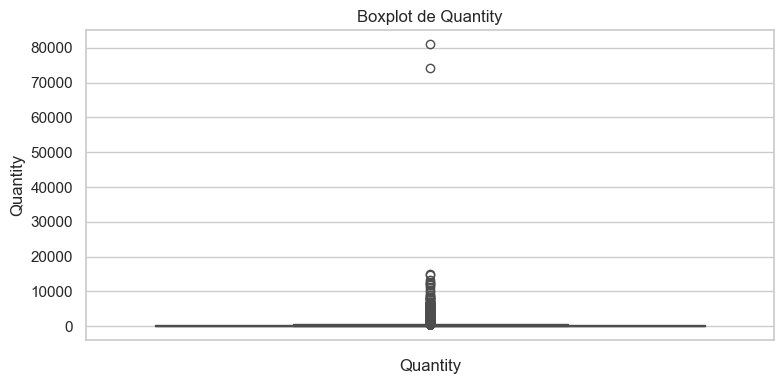

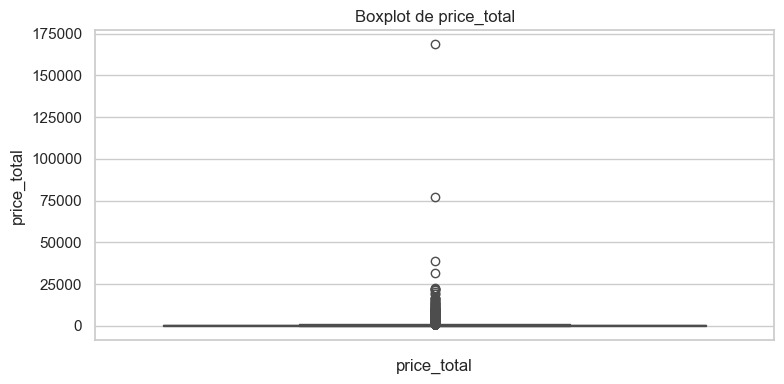

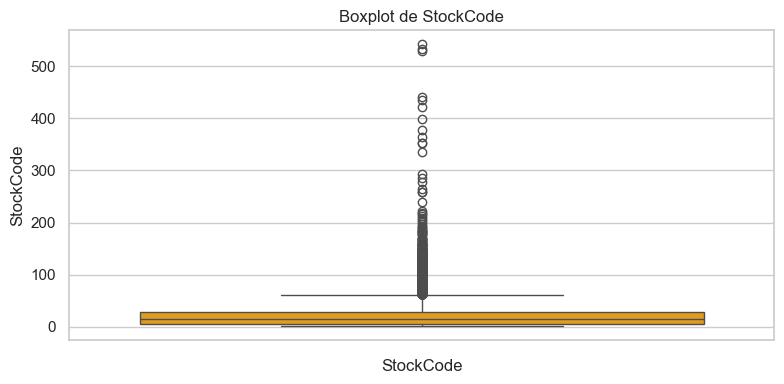

In [273]:
# Configuración general de estilo
sns.set(style="whitegrid")

# Columnas a analizar
cols_to_plot = ['Quantity', 'price_total', 'StockCode']

# Boxplots para las columnas numéricas
for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col, color='orange')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

La data presenta varios outliers, por lo que procederemos a eliminarlos.

In [274]:
mascara = (df.Quantity<df['Quantity'].quantile([0.95]).values[0]) & (df.price_total<df['price_total'].quantile([0.95]).values[0])
df_sin_outliers = df[mascara]
df_sin_outliers.shape

(17337, 6)

Presentaremos nuevamente los graficos

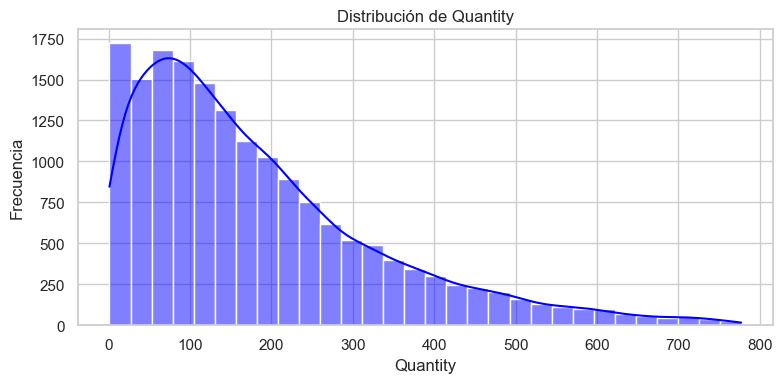

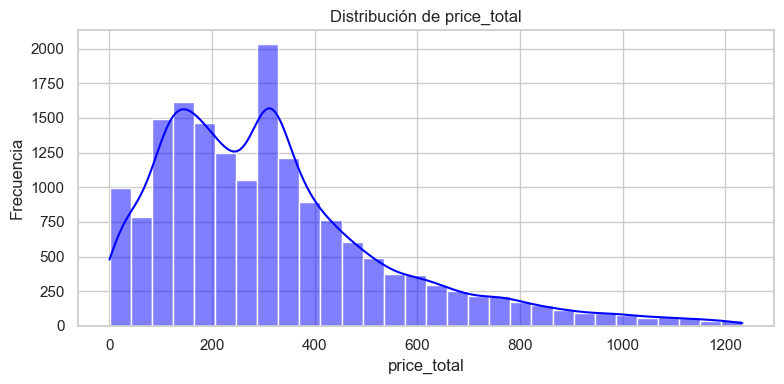

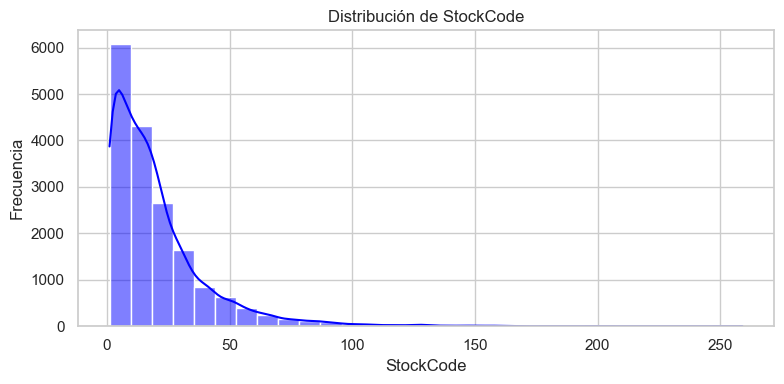

In [275]:
# Configuración general de estilo
sns.set(style="whitegrid")

# Columnas a analizar
cols_to_plot = ['Quantity', 'price_total', 'StockCode']

# Gráfico de distribución para cada columna en df_sin_outliers
for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    
    if df_sin_outliers[col].dtype in ['float64', 'int64']:  # Variables numéricas
        sns.histplot(df_sin_outliers[col], kde=True, bins=30, color='blue')
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
    
    elif df_sin_outliers[col].dtype == 'object':  # Variables categóricas
        top_categories = df_sin_outliers[col].value_counts().head(10)  # Las 10 categorías más comunes
        sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
        plt.title(f"Frecuencia de las 10 principales categorías en {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

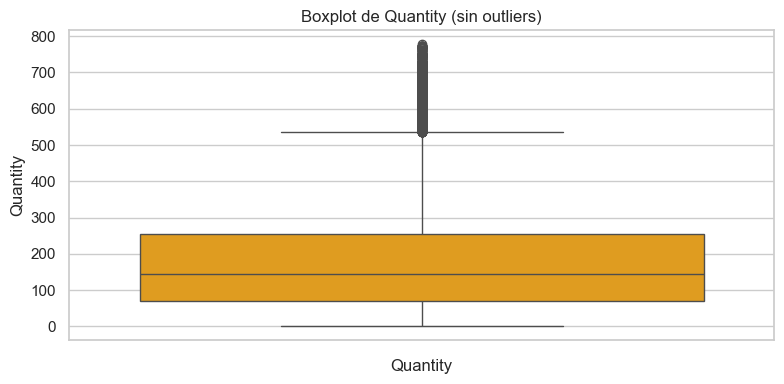

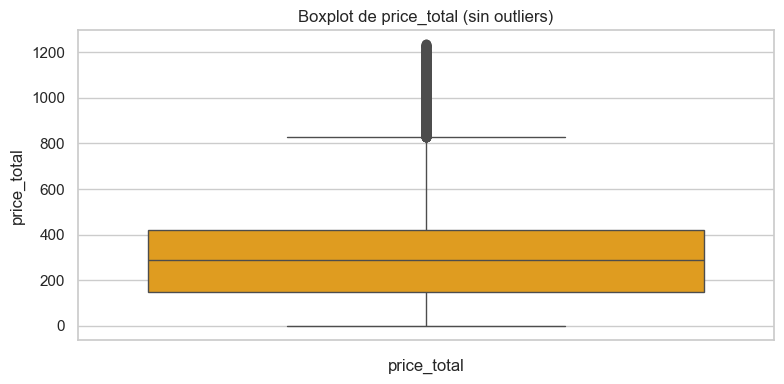

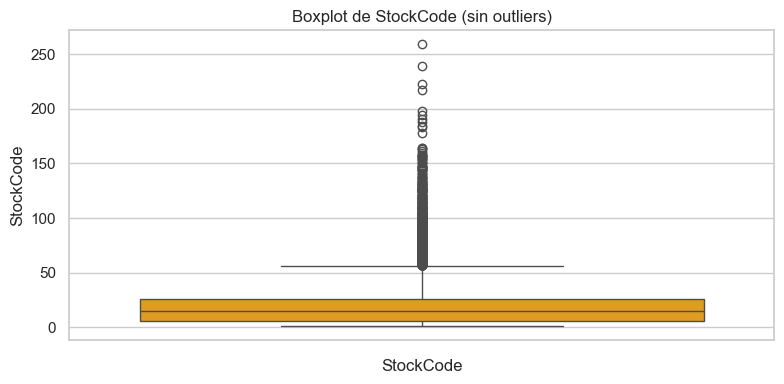

In [276]:
# Boxplots para las columnas numéricas en df_sin_outliers
for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_sin_outliers, y=col, color='orange')
    plt.title(f"Boxplot de {col} (sin outliers)")
    plt.xlabel(col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


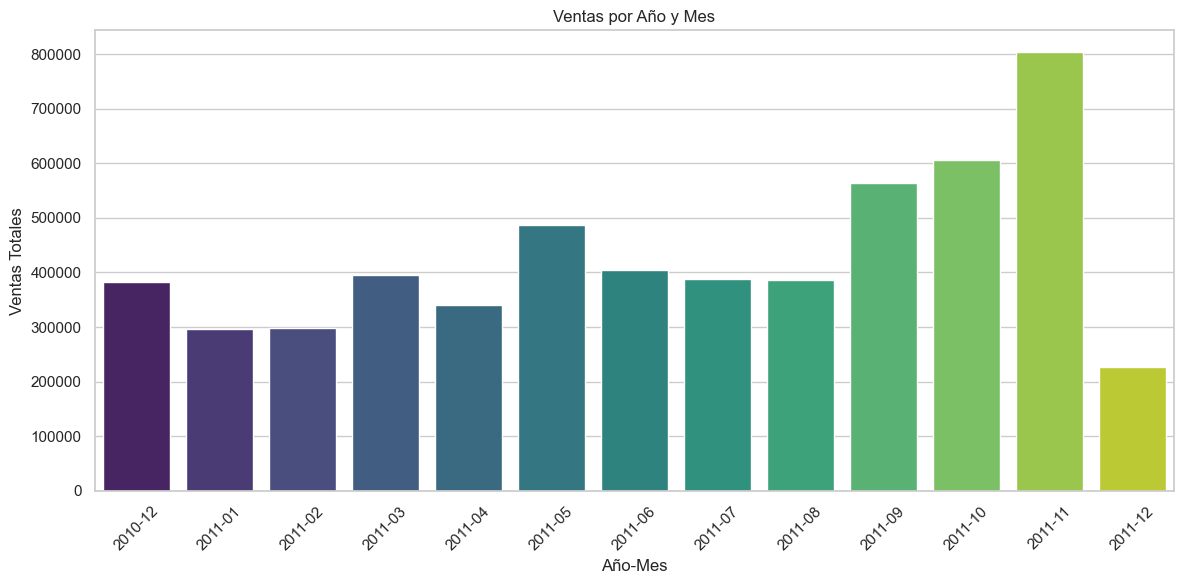

In [277]:
# Analizaremos como se comportaron las ventas durante el periodo de analisis
# Crear una columna 'Año_Mes' que combine año y mes
df_sin_outliers['Año_Mes'] = df_sin_outliers['InvoiceDate'].dt.to_period('M')

# Agrupar por 'Año_Mes' y calcular la suma de las ventas ('price_total')
ventas_por_mes = df_sin_outliers.groupby('Año_Mes')['price_total'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Año_Mes', y='price_total', data=ventas_por_mes, palette='viridis')

# Ajustar el título y etiquetas
plt.title('Ventas por Año y Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [278]:
# Identificamos la ultima venta del mes de diciembre 2011
df_sin_outliers['InvoiceDate'].max()

Timestamp('2011-12-09 00:00:00')

### Con este analisis podemos determinar que el mes de diciembre 2011 esta incompleto, por lo que precedere a borrar estos datos.

In [279]:
# Eliminamos las ventas de mes de didiembre 2011
df_sin_outliers = df_sin_outliers.loc[df_sin_outliers.InvoiceDate < '2011-12-01']


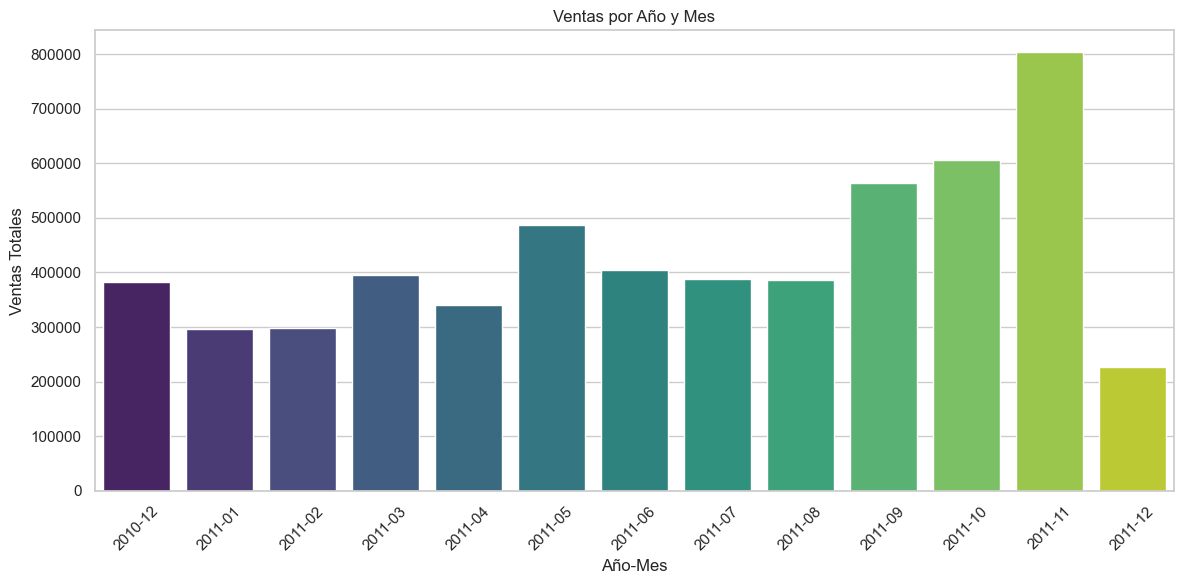

In [280]:
# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Año_Mes', y='price_total', data=ventas_por_mes, palette='viridis')

# Ajustar el título y etiquetas
plt.title('Ventas por Año y Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [281]:
# Verificamos la ultima fecha
df_sin_outliers['InvoiceDate'].max()

Timestamp('2011-11-30 00:00:00')

### Finalmente tenemos los datos sin outliers y sin el mes de diciembre 2011 que no estaba completo.

In [282]:
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16607 entries, 0 to 17757
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    16607 non-null  object        
 1   InvoiceDate  16607 non-null  datetime64[ns]
 2   CustomerID   16607 non-null  int64         
 3   Quantity     16607 non-null  int64         
 4   price_total  16607 non-null  float64       
 5   StockCode    16607 non-null  int64         
 6   Año_Mes      16607 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(3), object(1), period[M](1)
memory usage: 1.0+ MB


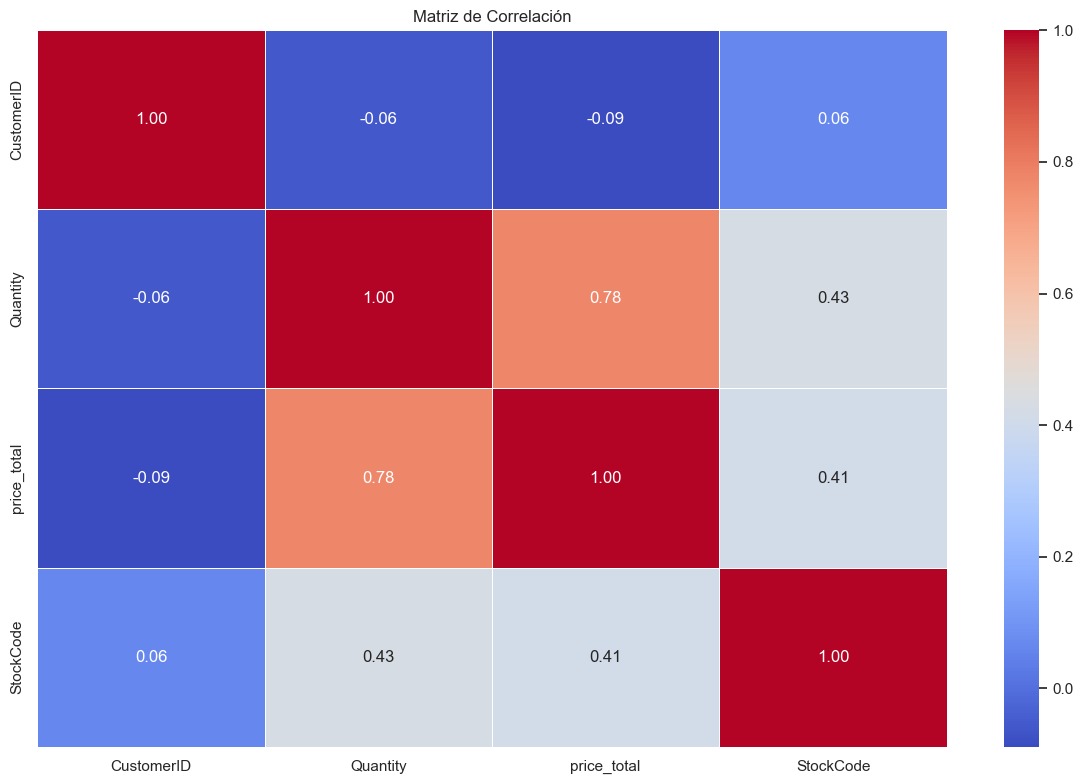

In [283]:
# Seleccionamos solo las columnas numéricas para el análisis de correlación
df_numeric = df_sin_outliers.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Ajustar el título y etiquetas
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

### Observaciones:
- Se observa una alta correlacion entre la cantidad comprada y el precio total por razones obvias.
- Aun asi el precio total no se ve igualmente relacionado con la variedad de productos comprados.

2. Generar variables para la segmentación. Notar que la granularidad de la data es por
boleta y se necesita segmentar clientes, por lo que es necesario generar variables a
nivel de clientes. Se propone generar al menos RFM (Recencia, frecuencia y monto).

In [284]:
# Variables de segmentacion
df_sin_outliers.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,Año_Mes
0,536365,2010-12-01,17850,40,139.12,7,2010-12
1,536366,2010-12-01,17850,12,22.20,2,2010-12
2,536367,2010-12-01,13047,83,278.73,12,2010-12
3,536368,2010-12-01,13047,15,70.05,4,2010-12
4,536369,2010-12-01,13047,3,17.85,1,2010-12


In [285]:
# Generamos la agrupacion por cliente
df_segment = df_sin_outliers.groupby('CustomerID').agg(
            ult_compra = ('InvoiceDate', 'max'),
            frecuencia = ('InvoiceNo', 'count'),
            cantidad_promedio = ('Quantity', 'mean'),
            cantidad_total = ('Quantity', 'sum'),
            monto_promedio = ('price_total', 'mean'),
            monto_total = ('price_total', 'sum'),
            art_dist_promedio = ('StockCode', 'mean'),
            meses_distintos = ('Año_Mes', 'nunique')
)
df_segment

,ult_compra,frecuencia,cantidad_promedio,cantidad_total,monto_promedio,monto_total,art_dist_promedio,meses_distintos
CustomerID,,,,,,,,
12347,2011-08-02,5,318.000000,1590,558.172,2790.86,24.800000,5
12348,2011-09-25,3,362.333333,1087,301.480,904.44,4.666667,3
12350,2011-02-02,1,197.000000,197,334.400,334.40,17.000000,1
12352,2011-11-03,8,67.000000,536,313.255,2506.04,10.625000,4
12353,2011-05-19,1,20.000000,20,89.000,89.00,4.000000,1
...,...,...,...,...,...,...,...,...
18280,2011-03-07,1,45.000000,45,180.600,180.60,10.000000,1
18281,2011-06-12,1,54.000000,54,80.820,80.82,7.000000,1
18282,2011-08-05,1,75.000000,75,100.210,100.21,7.000000,1


In [286]:
# Calculamos la recencia, para esto tomamos la última fecha 2011-12-01 como la fecha del análisis
df_segment['recencia_dias'] = (pd.to_datetime('2011-12-01') - df_segment['ult_compra']).dt.days 

In [287]:
df_segment['recencia_dias']

CustomerID
12347    121
12348     67
12350    302
12352     28
12353    196
        ... 
18280    269
18281    172
18282    118
18283      1
18287     34
Name: recencia_dias, Length: 4211, dtype: int64

3. Realizar un análisis exploratorio y las transformaciones necesarias a las nuevas
variables.

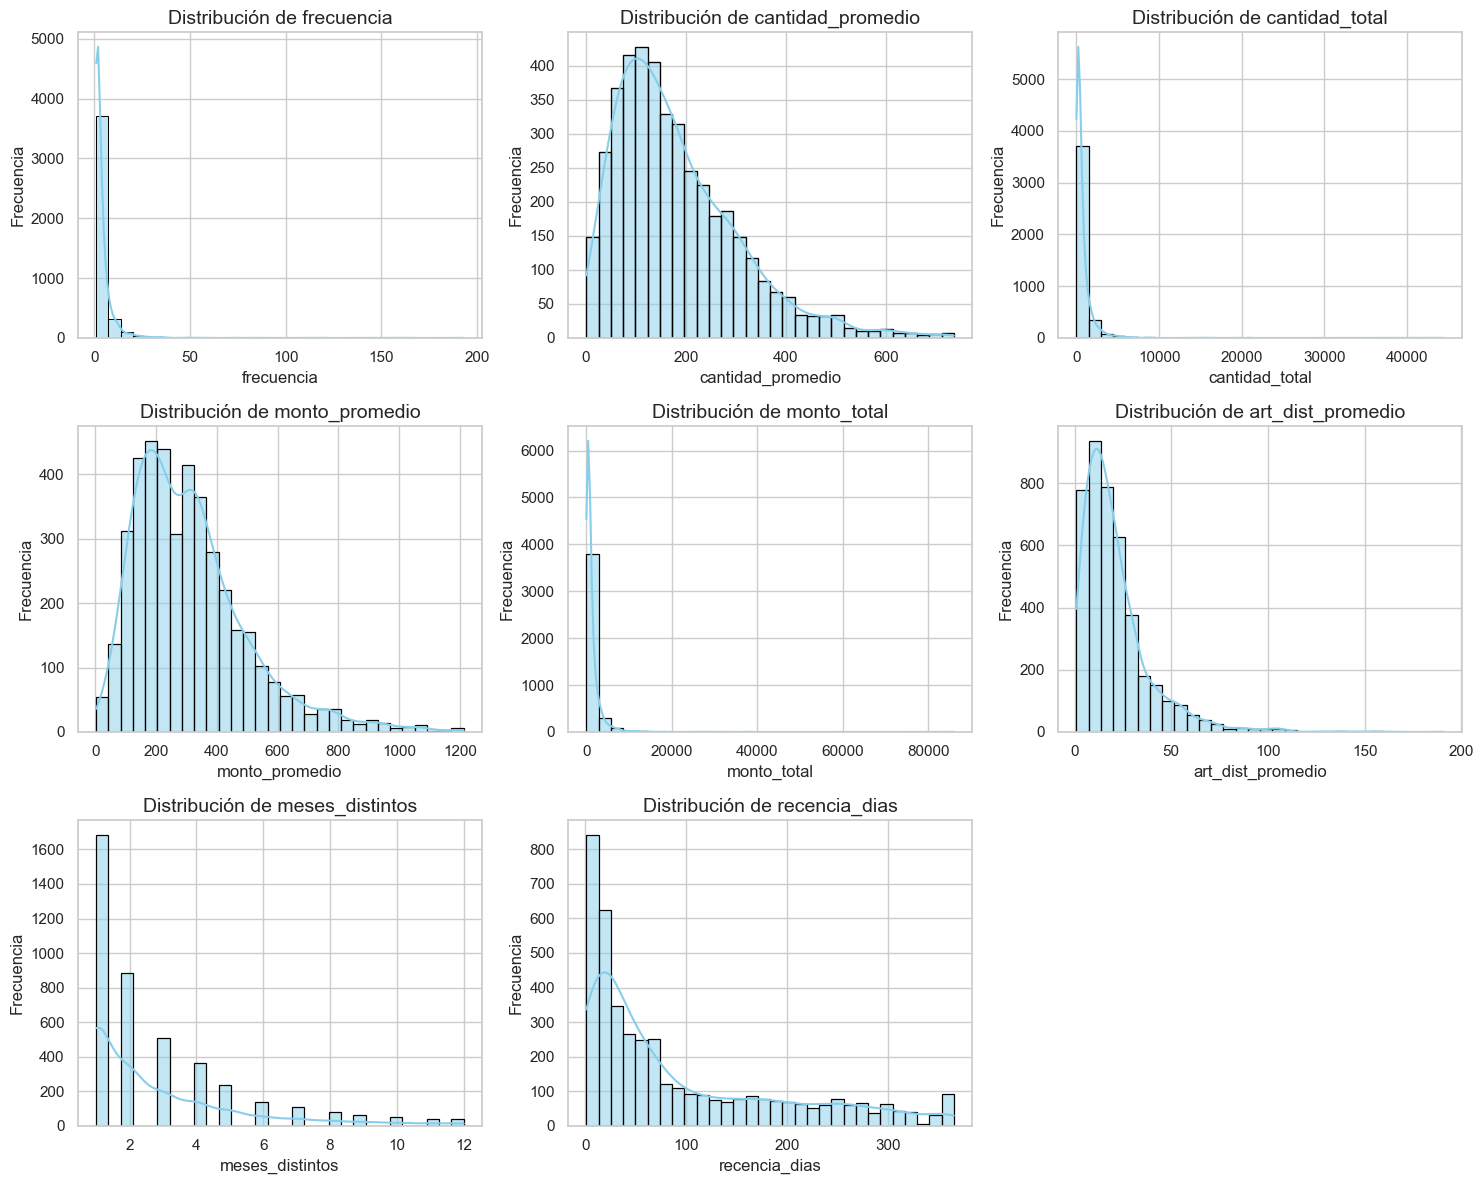

In [288]:
# Definimos la distribucion de las nuevas columnas
plt.figure(figsize=(15, 12))  # Tamaño del gráfico más grande

# Creamos los gráficos en un grid
for n, i in enumerate(df_segment.columns[1:]):
    plt.subplot(3, 3, n + 1)  # 3 filas, 3 columnas
    sns.histplot(df_segment[i], kde=True, bins=30, color='skyblue', edgecolor='black')
    
    # Título y formato
    plt.title(f"Distribución de {i}", fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    
    # Ajuste de layout para evitar que los títulos se solapen
    plt.tight_layout()

# Mostrar el gráfico
plt.show()

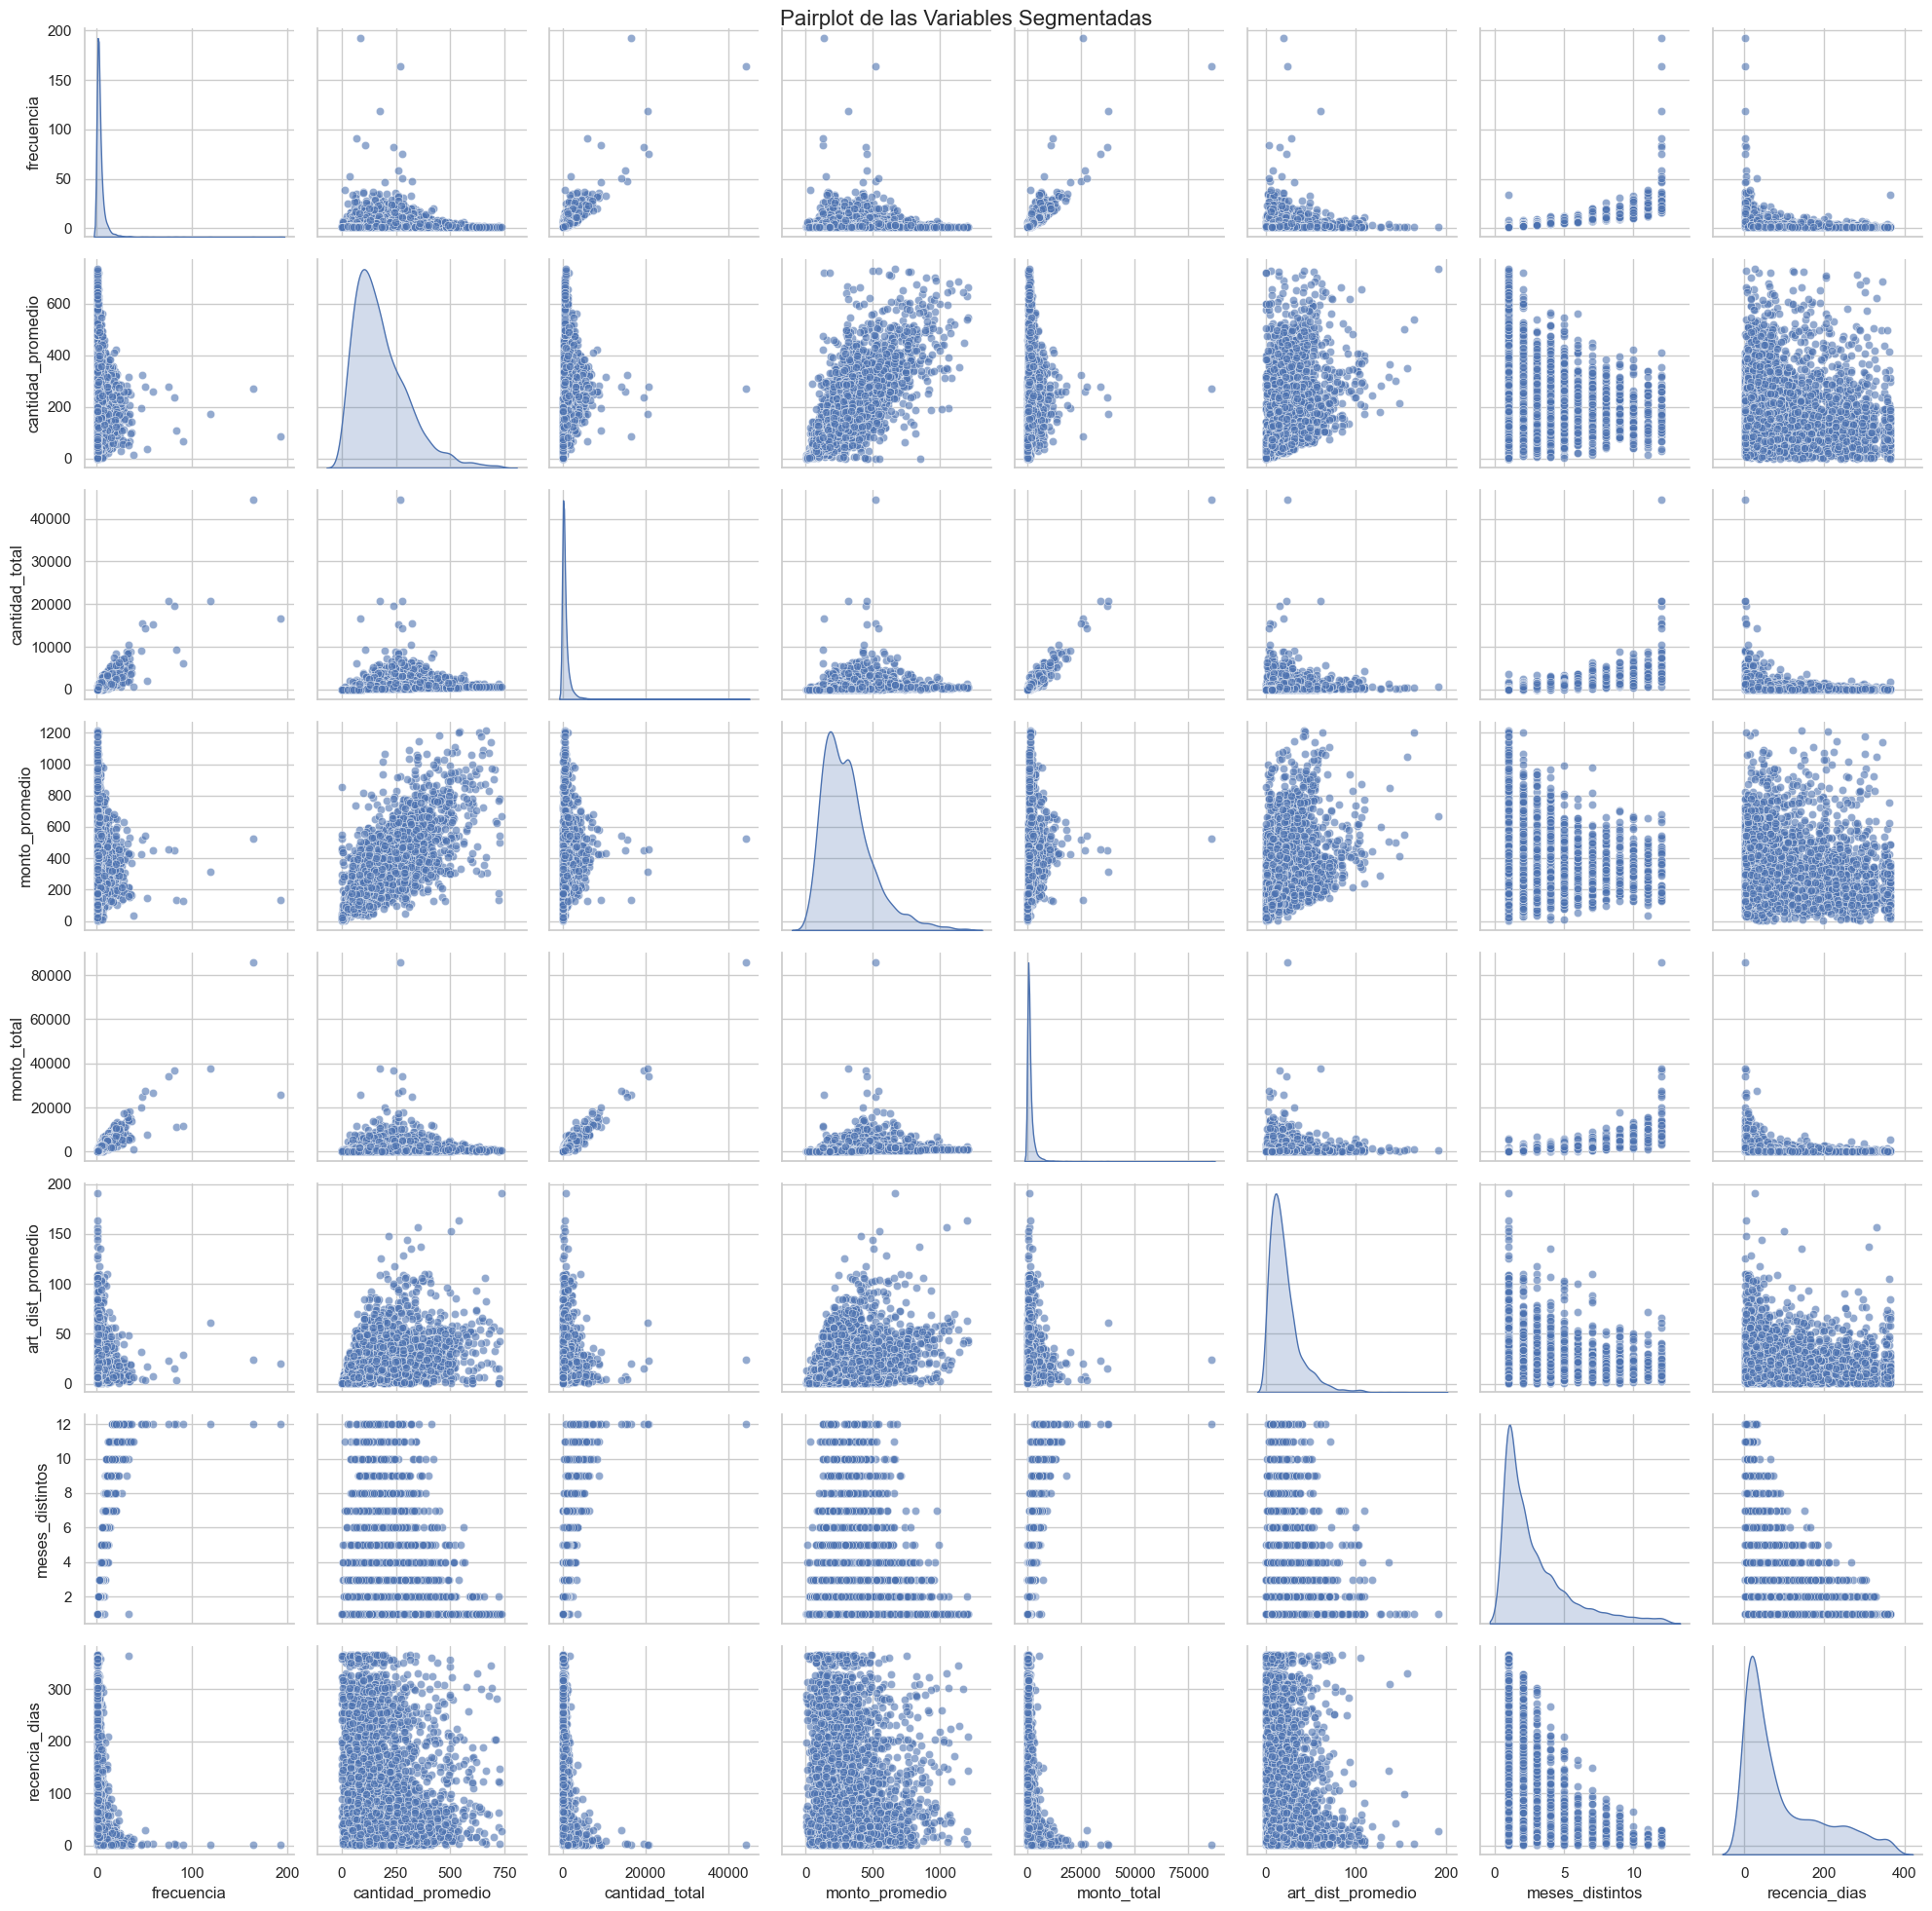

In [289]:
# Visualizamos las posibles relaciones
# Crear el pairplot
sns.pairplot(df_segment,
             diag_kind='kde',      # Para usar una curva de densidad en las diagonales
             plot_kws={'alpha': 0.6},  # Para hacer los puntos semitransparentes
             palette='coolwarm',   # Estilo de colores
             height=2.5)           # Tamaño de los gráficos

# Ajustar título y diseño
plt.suptitle('Pairplot de las Variables Segmentadas', size=16)
plt.tight_layout()
plt.show()

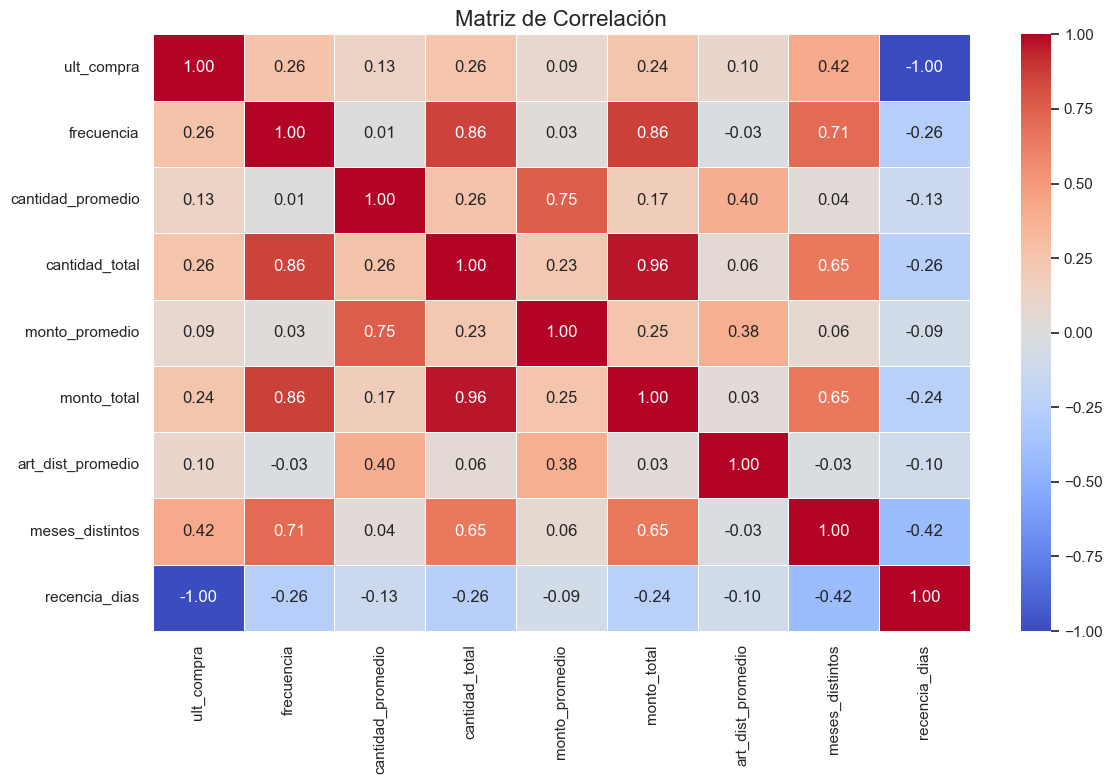

In [290]:
# Calcular la matriz de correlación de todas las columnas numéricas en df_segment
correlation_matrix = df_segment.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))  # Tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Ajustar título y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

In [291]:
# Seleccionamos y estandarizamos las variables con las que vamos a trabajar.
X = df_segment.loc[:, ['frecuencia', 'monto_promedio', 'recencia_dias']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [292]:
# Creamos un DF con los datos estandarizados y damos nombres mas genericos a las columnas
df_clusters = pd.DataFrame(X_scaled, columns = ['var1', 'var2', 'var3'], index = X.index)
df_clusters.head()

,var1,var2,var3
CustomerID,,,
12347,0.156436,1.309476,0.279692
12348,-0.139765,-0.059698,-0.264114
12350,-0.435966,0.115895,2.102447
12352,0.600736,0.003109,-0.656862
12353,-0.435966,-1.193049,1.034977


4. Aplicar al menos 2 algoritmos de clustering. Buscar el número indicado de clusters
que pueden tener y visualizar los cluster resultantes de los algoritmos.

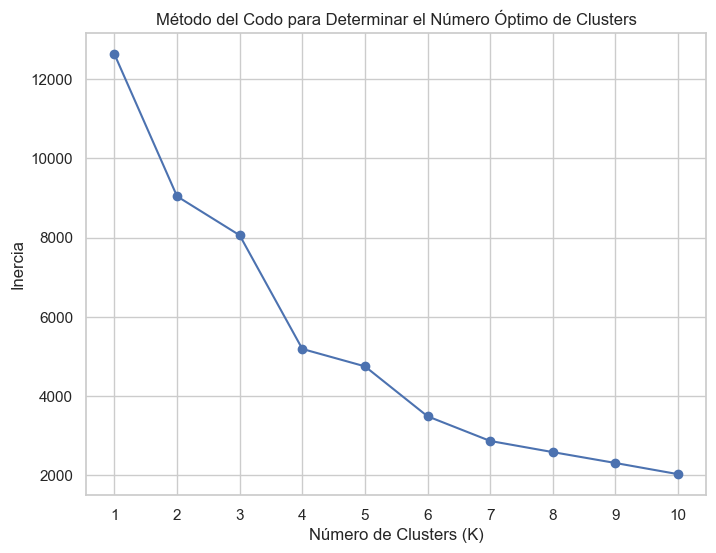

In [293]:
# Establecer el rango de valores de K a probar
k_range = range(1, 11)  # Probar con números de clusters entre 1 y 10
inertia = []

# Calcular la inercia para cada valor de K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clusters)  # Usamos los datos escalados (df_clusters)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)  # Para mostrar todos los valores de K
plt.grid(True)
plt.show()


### Entre 3 y 5 se pueden ver buenos prospecto de cluster optimo

In [294]:
# Aplicamos KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clusters)

# Guardamos Labels
X['kmeans_labels'] = kmeans_labels

# Graficar los clusters
plt.figure(figsize=(8, 6))

# Usamos las primeras dos variables (var1, var2) para el gráfico
sns.scatterplot(x=df_clusters['var1'], y=df_clusters['var2'], hue=df_clusters['cluster_agg'], palette='Set1', s=100, marker='o')

# Añadir el centroide de cada cluster
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroides')

# Ajustes del gráfico
plt.title('Clusters de Clientes con KMeans (4 clusters)')
plt.xlabel('Var1')
plt.ylabel('Var2')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'cluster_agg'

<Figure size 800x600 with 0 Axes>

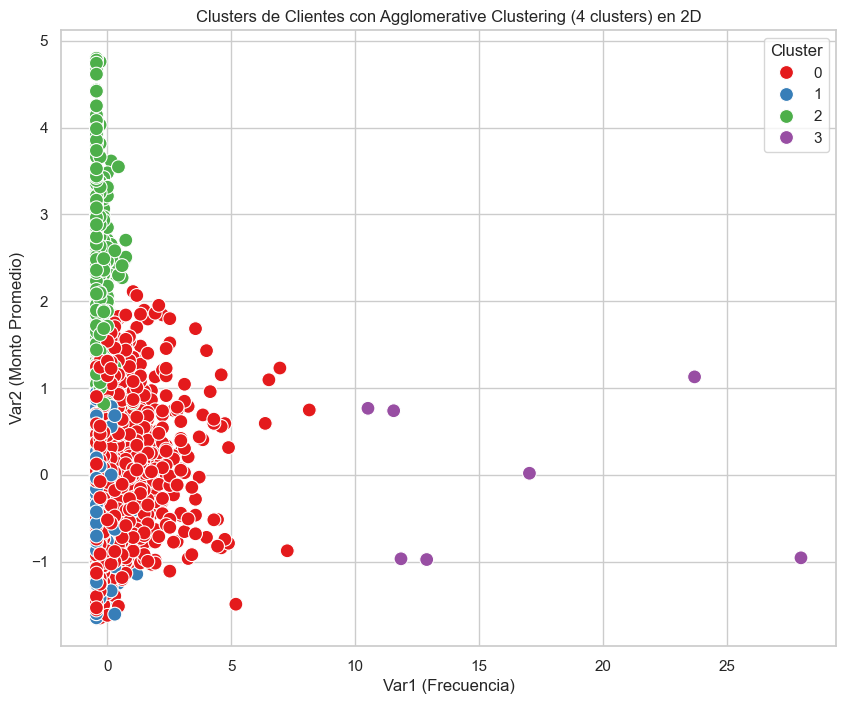

In [296]:
# Aplicar Agglomerative Clustering con 4 clusters
agg_clust = AgglomerativeClustering(n_clusters=4)
df_clusters['cluster_agg'] = agg_clust.fit_predict(X_scaled)

# Crear gráfico de dispersión 2D usando dos variables del DataFrame
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_clusters['var1'], y=df_clusters['var2'], hue=df_clusters['cluster_agg'], palette='Set1', s=100, marker='o')

# Títulos y etiquetas
plt.title('Clusters de Clientes con Agglomerative Clustering (4 clusters) en 2D')
plt.xlabel('Var1 (Frecuencia)')
plt.ylabel('Var2 (Monto Promedio)')

# Mostrar el gráfico
plt.legend(title='Cluster')
plt.show()

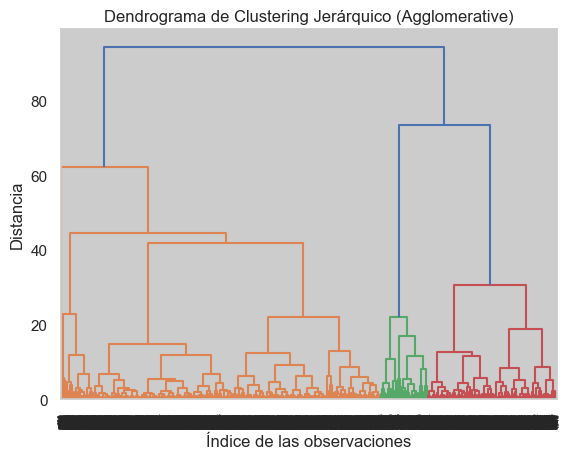

In [297]:
# Calcular la matriz de distancia
distances = pdist(df_clusters)

# Calcular la matriz de enlace
linkage_matrix = linkage(distances, method='ward')

# Generar dendrograma
dendrogram(linkage_matrix)

# Título y etiquetas
plt.title('Dendrograma de Clustering Jerárquico (Agglomerative)')
plt.xlabel('Índice de las observaciones')
plt.ylabel('Distancia')

# Mostrar el gráfico
plt.show()


5. Evaluar la calidad de los clustering de forma numérica y realizar una explicación de
cada segmento asignándoles un nombre descriptivo.

In [298]:
# Asegúrate de tener las etiquetas de KMeans y Agglomerative
kmeans_labels = kmeans.labels_  # Etiquetas generadas por KMeans
agg_labels = agg_clust.labels_  # Etiquetas generadas por Agglomerative Clustering

# Validación de clusters
for labels_i in [kmeans_labels, agg_labels]:
    db_index = davies_bouldin_score(df_clusters, labels_i)
    silhouette_avg = silhouette_score(df_clusters, labels_i) 
    print(f'Índice de Davies-Bouldin: {db_index}')
    print(f'Coeficiente de Silhouette: {silhouette_avg}')
    print('*' * 100)

Índice de Davies-Bouldin: 0.9428994414688723
Coeficiente de Silhouette: 0.43341774640042097
****************************************************************************************************
Índice de Davies-Bouldin: 0.680456786015377
Coeficiente de Silhouette: 0.4798217571218878
****************************************************************************************************


In [299]:
resumen = X.reset_index().groupby('kmeans_labels').agg({
        'CustomerID': 'count',
        'frecuencia': ['mean', 'std'],
        'monto_promedio': ['mean', 'std'],
        'recencia_dias': ['mean', 'std'],
})
resumen.index = ['Compradores ocasionales - unicos', 'Compradores de Montos altos', 'Comparadores frecuentes', 'outliers']
resumen

CustomerID frecuencia             \
                                      count       mean        std   
Compradores ocasionales - unicos        993   1.562941   1.082446   
Compradores de Montos altos             744   3.318548   3.031797   
Comparadores frecuentes                 102  31.990196  26.611430   
outliers                               2372   3.930438   3.331630   

                                 monto_promedio             recencia_dias  \
                                           mean         std          mean   
Compradores ocasionales - unicos     227.424997  124.033055    244.159114   
Compradores de Montos altos          620.620938  163.021890     73.350806   
Comparadores frecuentes              342.351835  133.087931     13.303922   
outliers                             250.492205  100.990444     39.712057   

                                             
                                        std  
Compradores ocasionales - unicos  65.863441  
Compradores de Montos altos       72.443986  
Comparadores frecuentes           36.671080  
outliers                          34.515825